In [20]:
import json
import torch
import numpy as np 

%matplotlib inline
import matplotlib.pyplot as plt

from sentence_transformers import SentenceTransformer, util
from PIL import Image

In [17]:
with open("dataset_beluga.json", "r") as f:
    data = json.load(f)    
all_files = [e["path"] for e in data]

In [18]:
model = SentenceTransformer('clip-ViT-L-14')

In [19]:
with torch.inference_mode():
    img_emb = model.encode([Image.open(e) for e in all_files])

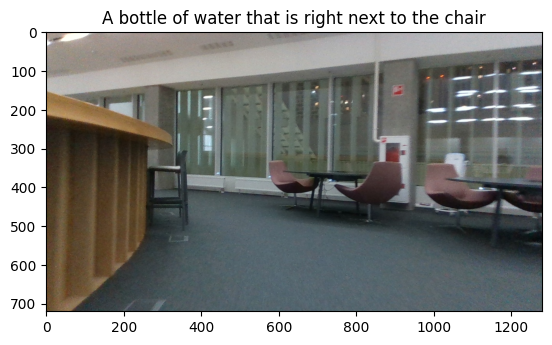

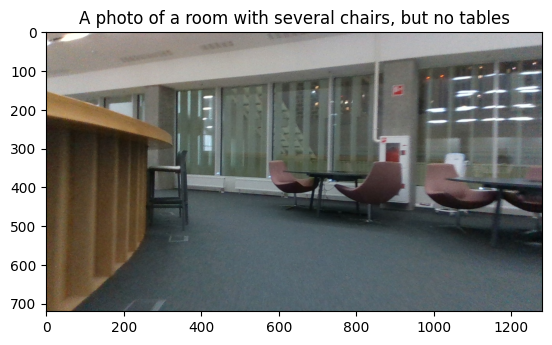

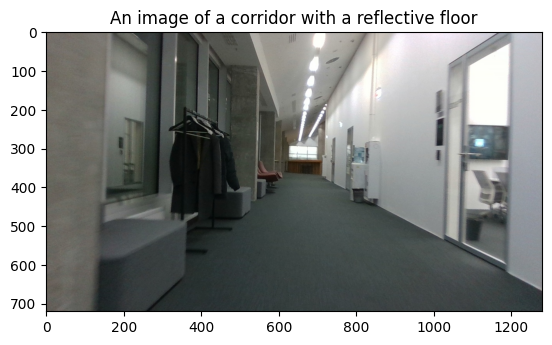

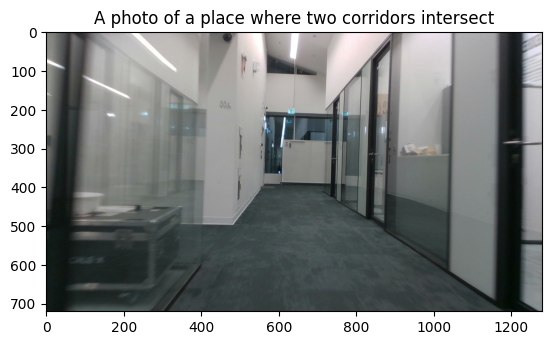

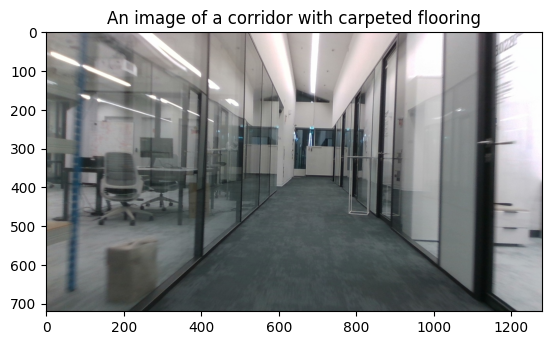

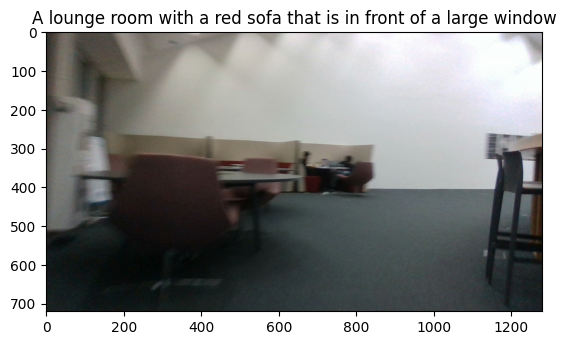

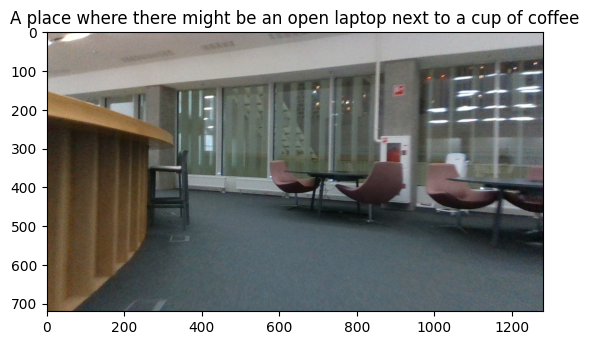

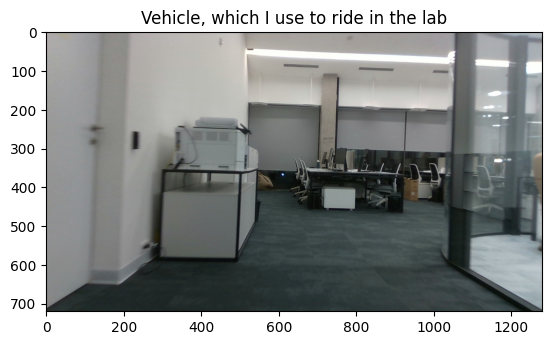

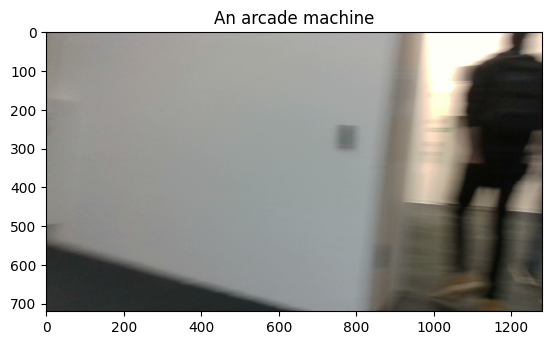

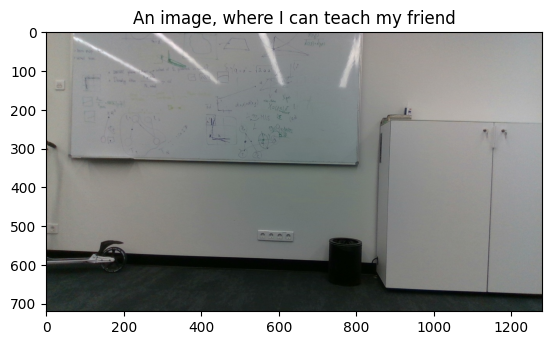

In [22]:
promtps = [
    "A bottle of water that is right next to the chair",
    "A photo of a room with several chairs, but no tables",
    "An image of a corridor with a reflective floor",
    "A photo of a place where two corridors intersect",
    "An image of a corridor with carpeted flooring",
    "A lounge room with a red sofa that is in front of a large window",
    "A place where there might be an open laptop next to a cup of coffee",
    "Vehicle, which I use to ride in the lab",
    "An arcade machine",
    "An image, where I can teach my friend"
]

for prompt in promtps:

    with torch.inference_mode():
        text_emb = model.encode(prompt)
    cos_scores = util.cos_sim(img_emb, text_emb)
    idx = cos_scores.squeeze(1).argmax()

    img = np.array(Image.open(all_files[idx]))
    
    plt.imshow(img)
    plt.title(prompt)
    plt.show()